In [ ]:
#M22AI608- DeepLearning - Assignement2 - SummerSemister-1

In [41]:
###TASK-1 - M22AI608

In [ ]:
#Task1: Training masked autoencoder on PASCAL VOC 2007  dataset
#Download the PASCAL VOC 2007 dataset from here.
#Preprocess the dataset by resizing the images to a fixed size and normalizing the pixel values.


In [1]:
#Libraries
import os
import cv2
import numpy as np



In [2]:
# Set the desired image size
desired_size = (64,64)

# Set the path to the downloaded dataset
dataset_path = "C:\\Users\\Admin\\OneDrive\\Desktop\\M22ai608_DL_assign2\\VOC2007"

# Create empty lists to store the preprocessing images
preprocessed_images = []
count = 1
clean_images = []



In [3]:
# Locate JPEG images in the JPEG images folder
jpeg_images_folder = os.path.join(dataset_path, "JPEGImages")

# Loop through the images in the JPEG images folder
for filename in os.listdir(jpeg_images_folder):
    # Read the clean image
    print(f"Processing image {count}")
    count += 1
    image_path = os.path.join(jpeg_images_folder, filename)
    clean_image = cv2.imread(image_path)
    
    # Resize the clean image
    resized_image = cv2.resize(clean_image, desired_size)

    # Normalize pixel values to range 0-1
    normalized_image = resized_image.astype(np.float32) / 255.0

    # Add Gaussian noise to clean image
    noise = np.random.normal(loc=0, scale=0.1, size=normalized_image.shape)
    noisy_image = np.clip(normalized_image + noise, 0.0, 1.0)

    # Append the noisy and clean images to the lists
    preprocessed_images.append(noisy_image)
    clean_images.append(normalized_image)

# Convert the lists of preprocessed and clean images to numpy arrays
preprocessed_images = np.array(preprocessed_images)
clean_images = np.array(clean_images)



Processing image 1
Processing image 2
Processing image 3
Processing image 4
Processing image 5
Processing image 6
Processing image 7
Processing image 8
Processing image 9
Processing image 10
Processing image 11
Processing image 12
Processing image 13
Processing image 14
Processing image 15
Processing image 16
Processing image 17
Processing image 18
Processing image 19
Processing image 20
Processing image 21
Processing image 22
Processing image 23
Processing image 24
Processing image 25
Processing image 26
Processing image 27
Processing image 28
Processing image 29
Processing image 30
Processing image 31
Processing image 32
Processing image 33
Processing image 34
Processing image 35
Processing image 36
Processing image 37
Processing image 38
Processing image 39
Processing image 40
Processing image 41
Processing image 42
Processing image 43
Processing image 44
Processing image 45
Processing image 46
Processing image 47
Processing image 48
Processing image 49
Processing image 50
Processin

In [4]:
# Print the shapes of the preprocessed and clean images arrays
print("Preprocessed Images Shape:", preprocessed_images.shape)
print("Clean Images Shape:", clean_images.shape)


Preprocessed Images Shape: (4952, 64, 64, 3)
Clean Images Shape: (4952, 64, 64, 3)


In [5]:

#Dataset split: (Run Task.1.3(a) with both the following splits and choose the best one for Task.1.3(b), Task.1.3(c) and next experiments.)
#Use 80-10-10, train-val-test split 
#Use 70-10-20, train-val-test split 


In [6]:
#Use 70-10-20, train-val-test split
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets (70-20-10 split)
x_train_val_70_20_10, x_test_70_20_10, y_train_val_70_20_10, y_test_70_20_10 = train_test_split(
    preprocessed_images, clean_images, test_size=0.1, random_state=42)
x_train_70_20_10, x_val_70_20_10, y_train_70_20_10, y_val_70_20_10 = train_test_split(
    x_train_val_70_20_10, y_train_val_70_20_10, test_size=0.25, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train Set Shapes:", x_train_70_20_10.shape, y_train_70_20_10.shape)
print("Validation Set Shapes:", x_val_70_20_10.shape, y_val_70_20_10.shape)
print("Test Set Shapes:", x_test_70_20_10.shape, y_test_70_20_10.shape)



Train Set Shapes: (3342, 64, 64, 3) (3342, 64, 64, 3)
Validation Set Shapes: (1114, 64, 64, 3) (1114, 64, 64, 3)
Test Set Shapes: (496, 64, 64, 3) (496, 64, 64, 3)


In [7]:
#Use 80-10-10, train-val-test split
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets (80-10-10 split)
x_train_val_80_10_10, x_test_80_10_10, y_train_val_80_10_10, y_test_80_10_10 = train_test_split(
    preprocessed_images, clean_images, test_size=0.10, random_state=42)
x_train_80_10_10, x_val_80_10_10, y_train_80_10_10, y_val_80_10_10 = train_test_split(
    x_train_val_80_10_10, y_train_val_80_10_10, test_size=0.1111, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train Set Shapes:", x_train_80_10_10.shape, y_train_80_10_10.shape)
print("Validation Set Shapes:", x_val_80_10_10.shape, y_val_80_10_10.shape)
print("Test Set Shapes:", x_test_80_10_10.shape, y_test_80_10_10.shape)


Train Set Shapes: (3960, 64, 64, 3) (3960, 64, 64, 3)
Validation Set Shapes: (496, 64, 64, 3) (496, 64, 64, 3)
Test Set Shapes: (496, 64, 64, 3) (496, 64, 64, 3)


In [ ]:
#Architecture: An autoencoder with three hidden layers with the following bottleneck dimension (on denoising task, add gaussian noise to the input image, and the output should be denoised image)
#256 (run using both the splits in 2, and choose the best one for the further set of experiments) 
#128 
#64 
#32 
#16 


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 dense (Dense)               (None, 64, 64, 128)       512       
                                                                 
 dense_1 (Dense)             (None, 64, 64, 64)        8256      
                                                                 
 dense_2 (Dense)             (None, 64, 64, 256)       16640     
                                                                 
 dense_3 (Dense)             (None, 64, 64, 64)        16448     
                                                                 
 dense_4 (Dense)             (None, 64, 64, 128)       8320      
                                                                 
 dense_5 (Dense)             (None, 64, 64, 3)         387 

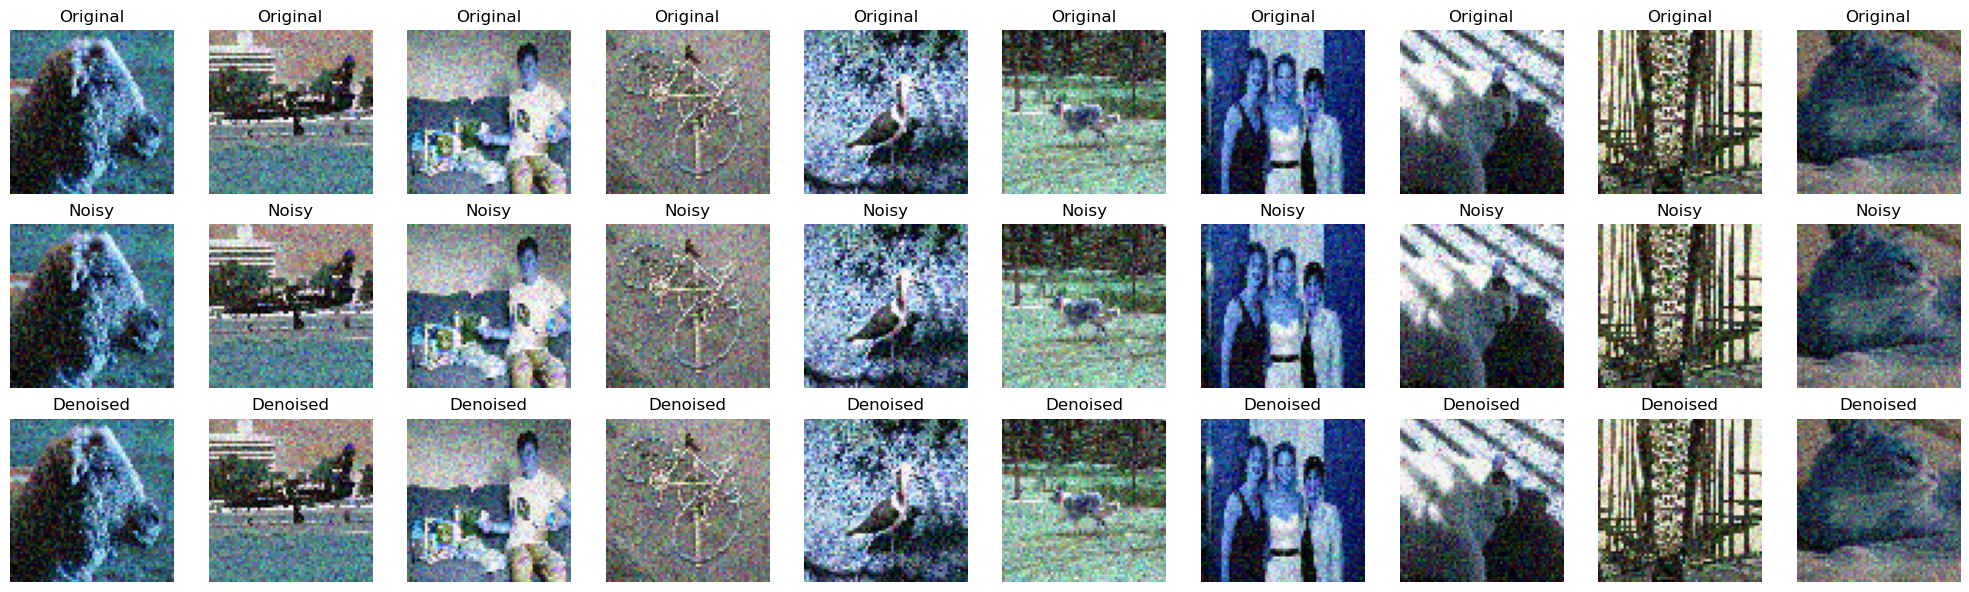

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the autoencoder model
input_img = Input(shape=(desired_size[0], desired_size[1], 3))
x = Dense(128, activation='relu')(input_img)
x = Dense(64, activation='relu')(x)
encoded = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(3, activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print the model summary
autoencoder.summary()

# Train the autoencoder model
autoencoder.fit(x_train_80_10_10, x_train_80_10_10,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_val_80_10_10, x_val_80_10_10))

# Evaluate the model on the test set
test_loss = autoencoder.evaluate(x_test_80_10_10, x_test_80_10_10)
print("Test loss:", test_loss)

# Generate denoised images for a sample of test images
denoised_images = autoencoder.predict(x_test_80_10_10[:10])

# Visualize the original, noisy, and denoised images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 10, figsize=(20, 6))
for i in range(10):
    axes[0, i].imshow(x_test_80_10_10[i])
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(x_test_80_10_10[i])
    axes[1, i].axis('off')
    axes[1, i].set_title('Noisy')

    axes[2, i].imshow(denoised_images[i])
    axes[2, i].axis('off')
    axes[2, i].set_title('Denoised')

plt.tight_layout()
plt.show()


In [ ]:
#Data split 80_10_10

In [8]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to create the autoencoder model
def create_autoencoder(input_shape, bottleneck_dim):
    # Input layer
    input_img = Input(shape=input_shape)

    # Add Gaussian noise to the input image
    noisy_input = tf.keras.layers.GaussianNoise(0.1)(input_img)

    # Encoder
    x = Conv2D(bottleneck_dim, (3, 3), activation='relu', padding='same')(noisy_input)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='bottleneck')(x)

    # Decoder
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(bottleneck_dim, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    # Compile the model
    autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

    return autoencoder

# Set the input shape
input_shape = (64, 64, 3)

# Set the bottleneck dimensions
bottleneck_dims = [256, 128, 64, 32, 16]

# Create a dictionary to store the loss values for each bottleneck dimension
loss_values = {}

# Loop through the bottleneck dimensions
for bottleneck_dim in bottleneck_dims:
    print("Bottleneck Dimension:", bottleneck_dim)

    # Create the autoencoder model
    autoencoder = create_autoencoder(input_shape, bottleneck_dim)

    # Train the model
    autoencoder.fit(
        x_train_80_10_10, x_train_80_10_10,
        validation_data=(x_val_80_10_10, x_val_80_10_10),
        epochs=10,
        batch_size=32
    )

    # Evaluate the loss on the validation set
    loss = autoencoder.evaluate(x_val_80_10_10, x_val_80_10_10)

    # Store the loss value
    loss_values[bottleneck_dim] = loss

    # Clear the session and reset graph for the next iteration
    tf.keras.backend.clear_session()

# Print the loss values for each bottleneck dimension
for bottleneck_dim, loss in loss_values.items():
    print("Bottleneck Dimension:", bottleneck_dim)
    print("Loss:", loss)
    print()


Bottleneck Dimension: 256


Epoch 1/10
124/124 [==============================] - 406s 3s/step - loss: 0.0399 - val_loss: 0.0302
Epoch 2/10
124/124 [==============================] - 396s 3s/step - loss: 0.0267 - val_loss: 0.0277
Epoch 3/10
124/124 [==============================] - 400s 3s/step - loss: 0.0247 - val_loss: 0.0248
Epoch 4/10
124/124 [==============================] - 397s 3s/step - loss: 0.0234 - val_loss: 0.0250
Epoch 5/10
124/124 [==============================] - 396s 3s/step - loss: 0.0225 - val_loss: 0.0228
Epoch 6/10
124/124 [==============================] - 394s 3s/step - loss: 0.0220 - val_loss: 0.0221
Epoch 7/10
124/124 [==============================] - 395s 3s/step - loss: 0.0211 - val_loss: 0.0226
Epoch 8/10
124/124 [==============================] - 338s 3s/step - loss: 0.0207 - val_loss: 0.0222
Epoch 9/10
124/124 [==============================] - 346s 3s/step - loss: 0.0204 - val_loss: 0.0215
Epoch 10/10
16/16 [==============================] - 7s 442ms/step - loss: 0.0230
Bottlenec

Epoch 1/10
124/124 [==============================] - 139s 1s/step - loss: 0.0404 - val_loss: 0.0331
Epoch 2/10
124/124 [==============================] - 146s 1s/step - loss: 0.0272 - val_loss: 0.0269
Epoch 3/10
124/124 [==============================] - 145s 1s/step - loss: 0.0256 - val_loss: 0.0262
Epoch 4/10
124/124 [==============================] - 153s 1s/step - loss: 0.0243 - val_loss: 0.0247
Epoch 5/10
124/124 [==============================] - 127s 1s/step - loss: 0.0237 - val_loss: 0.0273
Epoch 6/10
124/124 [==============================] - 130s 1s/step - loss: 0.0233 - val_loss: 0.0239
Epoch 7/10
124/124 [==============================] - 162s 1s/step - loss: 0.0228 - val_loss: 0.0241
Epoch 8/10
124/124 [==============================] - 155s 1s/step - loss: 0.0223 - val_loss: 0.0236
Epoch 9/10
124/124 [==============================] - 141s 1s/step - loss: 0.0220 - val_loss: 0.0225
Epoch 10/10
16/16 [==============================] - 2s 149ms/step - loss: 0.0250
Bottlenec

Epoch 1/10
124/124 [==============================] - 52s 409ms/step - loss: 0.0399 - val_loss: 0.0385
Epoch 2/10
124/124 [==============================] - 51s 410ms/step - loss: 0.0289 - val_loss: 0.0299
Epoch 3/10
124/124 [==============================] - 53s 427ms/step - loss: 0.0271 - val_loss: 0.0304
Epoch 4/10
124/124 [==============================] - 51s 413ms/step - loss: 0.0262 - val_loss: 0.0277
Epoch 5/10
124/124 [==============================] - 54s 439ms/step - loss: 0.0255 - val_loss: 0.0260
Epoch 6/10
124/124 [==============================] - 52s 417ms/step - loss: 0.0250 - val_loss: 0.0269
Epoch 7/10
124/124 [==============================] - 52s 417ms/step - loss: 0.0246 - val_loss: 0.0269
Epoch 8/10
124/124 [==============================] - 60s 486ms/step - loss: 0.0242 - val_loss: 0.0277
Epoch 9/10
124/124 [==============================] - 54s 432ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 10/10
16/16 [==============================] - 1s 70ms/step - loss:

Epoch 1/10
124/124 [==============================] - 27s 213ms/step - loss: 0.0456 - val_loss: 0.0364
Epoch 2/10
124/124 [==============================] - 27s 216ms/step - loss: 0.0321 - val_loss: 0.0309
Epoch 3/10
124/124 [==============================] - 26s 212ms/step - loss: 0.0289 - val_loss: 0.0309
Epoch 4/10
124/124 [==============================] - 26s 207ms/step - loss: 0.0279 - val_loss: 0.0287
Epoch 5/10
124/124 [==============================] - 26s 210ms/step - loss: 0.0272 - val_loss: 0.0276
Epoch 6/10
124/124 [==============================] - 26s 211ms/step - loss: 0.0266 - val_loss: 0.0273
Epoch 7/10
124/124 [==============================] - 27s 214ms/step - loss: 0.0263 - val_loss: 0.0280
Epoch 8/10
124/124 [==============================] - 32s 257ms/step - loss: 0.0259 - val_loss: 0.0277
Epoch 9/10
124/124 [==============================] - 316s 3s/step - loss: 0.0257 - val_loss: 0.0263
Epoch 10/10
16/16 [==============================] - 1s 44ms/step - loss: 0

Epoch 1/10
124/124 [==============================] - 19s 143ms/step - loss: 0.0562 - val_loss: 0.0414
Epoch 2/10
124/124 [==============================] - 15s 121ms/step - loss: 0.0357 - val_loss: 0.0383
Epoch 3/10
124/124 [==============================] - 15s 121ms/step - loss: 0.0336 - val_loss: 0.0345
Epoch 4/10
124/124 [==============================] - 15s 121ms/step - loss: 0.0325 - val_loss: 0.0338
Epoch 5/10
124/124 [==============================] - 15s 119ms/step - loss: 0.0318 - val_loss: 0.0328
Epoch 6/10
124/124 [==============================] - 15s 120ms/step - loss: 0.0307 - val_loss: 0.0307
Epoch 7/10
124/124 [==============================] - 15s 120ms/step - loss: 0.0287 - val_loss: 0.0302
Epoch 8/10
124/124 [==============================] - 15s 117ms/step - loss: 0.0281 - val_loss: 0.0298
Epoch 9/10
124/124 [==============================] - 15s 118ms/step - loss: 0.0278 - val_loss: 0.0296
Epoch 10/10
16/16 [==============================] - 0s 28ms/step - loss:

In [ ]:
#Data split 70_20_10

In [10]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to create the autoencoder model
def create_autoencoder(input_shape, bottleneck_dim):
    # Input layer
    input_img = Input(shape=input_shape)

    # Add Gaussian noise to the input image
    noisy_input = tf.keras.layers.GaussianNoise(0.1)(input_img)

    # Encoder
    x = Conv2D(bottleneck_dim, (3, 3), activation='relu', padding='same')(noisy_input)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='bottleneck')(x)

    # Decoder
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(bottleneck_dim, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    # Compile the model
    autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

    return autoencoder

# Set the input shape
input_shape = (64, 64, 3)

# Set the bottleneck dimensions
bottleneck_dims = [256, 128, 64, 32, 16]

# Create dictionaries to store the loss values for each bottleneck dimension
loss_values = {}

# Loop through the bottleneck dimensions
for bottleneck_dim in bottleneck_dims:
    print("Bottleneck Dimension:", bottleneck_dim)

    # Create the autoencoder model
    autoencoder = create_autoencoder(input_shape, bottleneck_dim)

    # Train the model
    autoencoder.fit(
        x_train_70_20_10, x_train_70_20_10,
        validation_data=(x_val_70_20_10, x_val_70_20_10),
        epochs=10,
        batch_size=32
    )

    # Evaluate the loss on the validation set
    val_loss = autoencoder.evaluate(x_val_70_20_10, x_val_70_20_10)

    # Evaluate the loss on the test set
    test_loss = autoencoder.evaluate(x_test_70_20_10, x_test_70_20_10)

    # Store the loss values
    loss_values[bottleneck_dim] = {
        "Validation Loss": val_loss,
        "Test Loss": test_loss
    }

    # Clear the session and reset graph for the next iteration
    tf.keras.backend.clear_session()

# Print the loss values for each bottleneck dimension
for bottleneck_dim, losses in loss_values.items():
    print("Bottleneck Dimension:", bottleneck_dim)
    print("Validation Loss:", losses["Validation Loss"])
    print("Test Loss:", losses["Test Loss"])
    print()


Bottleneck Dimension: 256
Epoch 1/10
105/105 [==============================] - 340s 3s/step - loss: 0.0410 - val_loss: 0.0294
Epoch 2/10
105/105 [==============================] - 372s 4s/step - loss: 0.0267 - val_loss: 0.0260
Epoch 3/10
105/105 [==============================] - 370s 4s/step - loss: 0.0248 - val_loss: 0.0243
Epoch 4/10
105/105 [==============================] - 364s 3s/step - loss: 0.0237 - val_loss: 0.0252
Epoch 5/10
105/105 [==============================] - 363s 3s/step - loss: 0.0228 - val_loss: 0.0232
Epoch 6/10
105/105 [==============================] - 368s 4s/step - loss: 0.0223 - val_loss: 0.0220
Epoch 7/10
105/105 [==============================] - 365s 3s/step - loss: 0.0217 - val_loss: 0.0217
Epoch 8/10
105/105 [==============================] - 366s 3s/step - loss: 0.0210 - val_loss: 0.0219
Epoch 9/10
105/105 [==============================] - 287s 3s/step - loss: 0.0206 - val_loss: 0.0219
Epoch 10/10
16/16 [==============================] - 7s 445ms/ste

Epoch 1/10
105/105 [==============================] - 124s 1s/step - loss: 0.0393 - val_loss: 0.0323
Epoch 2/10
105/105 [==============================] - 119s 1s/step - loss: 0.0274 - val_loss: 0.0294
Epoch 3/10
105/105 [==============================] - 125s 1s/step - loss: 0.0256 - val_loss: 0.0274
Epoch 4/10
105/105 [==============================] - 126s 1s/step - loss: 0.0247 - val_loss: 0.0253
Epoch 5/10
105/105 [==============================] - 123s 1s/step - loss: 0.0238 - val_loss: 0.0254
Epoch 6/10
105/105 [==============================] - 126s 1s/step - loss: 0.0233 - val_loss: 0.0240
Epoch 7/10
105/105 [==============================] - 122s 1s/step - loss: 0.0228 - val_loss: 0.0236
Epoch 8/10
105/105 [==============================] - 120s 1s/step - loss: 0.0224 - val_loss: 0.0240
Epoch 9/10
105/105 [==============================] - 123s 1s/step - loss: 0.0221 - val_loss: 0.0224
Epoch 10/10
16/16 [==============================] - 3s 172ms/step - loss: 0.0227
Bottlenec

Epoch 1/10
105/105 [==============================] - 56s 528ms/step - loss: 0.0424 - val_loss: 0.0329
Epoch 2/10
105/105 [==============================] - 58s 551ms/step - loss: 0.0292 - val_loss: 0.0330
Epoch 3/10
105/105 [==============================] - 58s 556ms/step - loss: 0.0275 - val_loss: 0.0288
Epoch 4/10
105/105 [==============================] - 60s 575ms/step - loss: 0.0263 - val_loss: 0.0266
Epoch 5/10
105/105 [==============================] - 59s 561ms/step - loss: 0.0256 - val_loss: 0.0262
Epoch 6/10
105/105 [==============================] - 56s 533ms/step - loss: 0.0251 - val_loss: 0.0256
Epoch 7/10
105/105 [==============================] - 55s 524ms/step - loss: 0.0247 - val_loss: 0.0259
Epoch 8/10
105/105 [==============================] - 57s 547ms/step - loss: 0.0246 - val_loss: 0.0266
Epoch 9/10
105/105 [==============================] - 59s 565ms/step - loss: 0.0243 - val_loss: 0.0246
Epoch 10/10
16/16 [==============================] - 1s 73ms/step - loss:

Epoch 1/10
105/105 [==============================] - 25s 227ms/step - loss: 0.0492 - val_loss: 0.0373
Epoch 2/10
105/105 [==============================] - 23s 222ms/step - loss: 0.0337 - val_loss: 0.0367
Epoch 3/10
105/105 [==============================] - 24s 229ms/step - loss: 0.0304 - val_loss: 0.0304
Epoch 4/10
105/105 [==============================] - 24s 224ms/step - loss: 0.0287 - val_loss: 0.0296
Epoch 5/10
105/105 [==============================] - 23s 224ms/step - loss: 0.0278 - val_loss: 0.0298
Epoch 6/10
105/105 [==============================] - 24s 228ms/step - loss: 0.0271 - val_loss: 0.0282
Epoch 7/10
105/105 [==============================] - 24s 228ms/step - loss: 0.0266 - val_loss: 0.0275
Epoch 8/10
105/105 [==============================] - 23s 220ms/step - loss: 0.0262 - val_loss: 0.0277
Epoch 9/10
105/105 [==============================] - 24s 231ms/step - loss: 0.0260 - val_loss: 0.0274
Epoch 10/10
16/16 [==============================] - 1s 46ms/step - loss:

Epoch 1/10
105/105 [==============================] - 15s 134ms/step - loss: 0.0561 - val_loss: 0.0417
Epoch 2/10
105/105 [==============================] - 15s 141ms/step - loss: 0.0352 - val_loss: 0.0352
Epoch 3/10
105/105 [==============================] - 14s 130ms/step - loss: 0.0328 - val_loss: 0.0331
Epoch 4/10
105/105 [==============================] - 13s 128ms/step - loss: 0.0315 - val_loss: 0.0318
Epoch 5/10
105/105 [==============================] - 13s 127ms/step - loss: 0.0306 - val_loss: 0.0318
Epoch 6/10
105/105 [==============================] - 14s 130ms/step - loss: 0.0299 - val_loss: 0.0306
Epoch 7/10
105/105 [==============================] - 14s 129ms/step - loss: 0.0292 - val_loss: 0.0297
Epoch 8/10
105/105 [==============================] - 14s 130ms/step - loss: 0.0286 - val_loss: 0.0288
Epoch 9/10
105/105 [==============================] - 14s 130ms/step - loss: 0.0282 - val_loss: 0.0287
Epoch 10/10
16/16 [==============================] - 1s 29ms/step - loss:

In [ ]:
#From above result considering Datasplt-80_10_10 is good and using for further 

In [ ]:
#Choose the best bottleneck dimension, and re-run the autoencoder using masking strategy: (mask the following % of pixels in the image, i.e., set the pixel value to (0,0,0))
#20%
#40% 
#60%
#80%
#using Bottleneck Dimension: 16
#Loss: 0.030802978202700615

In [13]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Masking
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to create the autoencoder model with masking
def create_autoencoder_with_masking(input_shape, bottleneck_dim, mask_percentage):
    # Input layer
    input_img = Input(shape=input_shape)

    # Add Gaussian noise to the input image
    noisy_input = tf.keras.layers.GaussianNoise(0.1)(input_img)

    # Create a mask to randomly mask a certain percentage of pixels in the image
    mask = Masking(mask_value=0.0)(noisy_input)
    mask = tf.keras.layers.Lambda(lambda x: tf.where(tf.random.uniform(shape=tf.shape(x)) < mask_percentage, x, 0.0))(mask)

    # Encoder
    x = Conv2D(bottleneck_dim, (3, 3), activation='relu', padding='same')(mask)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='bottleneck')(x)

    # Decoder
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(bottleneck_dim // 2, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(bottleneck_dim, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    # Compile the model
    autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

    return autoencoder

# Set the input shape
input_shape = (64, 64, 3)

# Set the best bottleneck dimension
bottleneck_dim = 16

# Define the masking percentages
mask_percentages = [0.2, 0.4, 0.6, 0.8]

# Create a dictionary to store the loss values for each masking percentage
loss_values = {}

# Loop through the masking percentages
for mask_percentage in mask_percentages:
    print("Mask Percentage:", mask_percentage)

    # Create the autoencoder model with masking
    autoencoder = create_autoencoder_with_masking(input_shape, bottleneck_dim, mask_percentage)

    # Train the model
    autoencoder.fit(
        x_train_80_10_10, x_train_80_10_10,
        validation_data=(x_val_80_10_10, x_val_80_10_10),
        epochs=10,
        batch_size=32
    )

    # Evaluate the loss on the validation set
    val_loss = autoencoder.evaluate(x_val_80_10_10, x_val_80_10_10)

    # Evaluate the loss on the test set
    test_loss = autoencoder.evaluate(x_test_80_10_10, x_test_80_10_10)

    # Store the loss values
    loss_values[mask_percentage] = {
        "Validation Loss": val_loss,
        "Test Loss": test_loss
    }

    # Clear the session and reset graph for the next iteration
    tf.keras.backend.clear_session()

# Print the loss values for each masking percentage
for mask_percentage, losses in loss_values.items():
    print("Mask Percentage:", mask_percentage)
    print("Validation Loss:", losses["Validation Loss"])
    print("Test Loss:", losses["Test Loss"])
    print()


Mask Percentage: 0.2
Epoch 1/10
124/124 [==============================] - 17s 124ms/step - loss: 0.0540 - val_loss: 0.0407
Epoch 2/10
124/124 [==============================] - 15s 123ms/step - loss: 0.0380 - val_loss: 0.0369
Epoch 3/10
124/124 [==============================] - 17s 134ms/step - loss: 0.0360 - val_loss: 0.0358
Epoch 4/10
124/124 [==============================] - 16s 128ms/step - loss: 0.0350 - val_loss: 0.0351
Epoch 5/10
124/124 [==============================] - 16s 126ms/step - loss: 0.0343 - val_loss: 0.0342
Epoch 6/10
124/124 [==============================] - 16s 129ms/step - loss: 0.0338 - val_loss: 0.0338
Epoch 7/10
124/124 [==============================] - 16s 126ms/step - loss: 0.0334 - val_loss: 0.0333
Epoch 8/10
124/124 [==============================] - 16s 125ms/step - loss: 0.0326 - val_loss: 0.0322
Epoch 9/10
124/124 [==============================] - 16s 130ms/step - loss: 0.0315 - val_loss: 0.0320
Epoch 10/10
16/16 [==============================] -

Epoch 1/10
124/124 [==============================] - 17s 134ms/step - loss: 0.0517 - val_loss: 0.0394
Epoch 2/10
124/124 [==============================] - 16s 129ms/step - loss: 0.0372 - val_loss: 0.0366
Epoch 3/10
124/124 [==============================] - 16s 130ms/step - loss: 0.0356 - val_loss: 0.0354
Epoch 4/10
124/124 [==============================] - 16s 132ms/step - loss: 0.0345 - val_loss: 0.0348
Epoch 5/10
124/124 [==============================] - 16s 129ms/step - loss: 0.0337 - val_loss: 0.0338
Epoch 6/10
124/124 [==============================] - 17s 133ms/step - loss: 0.0326 - val_loss: 0.0323
Epoch 7/10
124/124 [==============================] - 22s 175ms/step - loss: 0.0311 - val_loss: 0.0314
Epoch 8/10
124/124 [==============================] - 19s 151ms/step - loss: 0.0306 - val_loss: 0.0318
Epoch 9/10
124/124 [==============================] - 22s 180ms/step - loss: 0.0302 - val_loss: 0.0307
Epoch 10/10
16/16 [==============================] - 1s 41ms/step - loss:

Epoch 1/10
124/124 [==============================] - 25s 175ms/step - loss: 0.0528 - val_loss: 0.0380
Epoch 2/10
124/124 [==============================] - 21s 170ms/step - loss: 0.0352 - val_loss: 0.0349
Epoch 3/10
124/124 [==============================] - 22s 176ms/step - loss: 0.0329 - val_loss: 0.0330
Epoch 4/10
124/124 [==============================] - 21s 169ms/step - loss: 0.0317 - val_loss: 0.0320
Epoch 5/10
124/124 [==============================] - 18s 143ms/step - loss: 0.0309 - val_loss: 0.0318
Epoch 6/10
124/124 [==============================] - 17s 138ms/step - loss: 0.0303 - val_loss: 0.0307
Epoch 7/10
124/124 [==============================] - 18s 142ms/step - loss: 0.0298 - val_loss: 0.0303
Epoch 8/10
124/124 [==============================] - 20s 162ms/step - loss: 0.0294 - val_loss: 0.0299
Epoch 9/10
124/124 [==============================] - 20s 159ms/step - loss: 0.0290 - val_loss: 0.0296
Epoch 10/10
16/16 [==============================] - 1s 35ms/step - loss:

Epoch 1/10
124/124 [==============================] - 19s 147ms/step - loss: 0.0578 - val_loss: 0.0399
Epoch 2/10
124/124 [==============================] - 17s 139ms/step - loss: 0.0360 - val_loss: 0.0360
Epoch 3/10
124/124 [==============================] - 20s 162ms/step - loss: 0.0337 - val_loss: 0.0339
Epoch 4/10
124/124 [==============================] - 18s 144ms/step - loss: 0.0326 - val_loss: 0.0327
Epoch 5/10
124/124 [==============================] - 17s 136ms/step - loss: 0.0318 - val_loss: 0.0318
Epoch 6/10
124/124 [==============================] - 21s 168ms/step - loss: 0.0308 - val_loss: 0.0302
Epoch 7/10
124/124 [==============================] - 18s 144ms/step - loss: 0.0291 - val_loss: 0.0294
Epoch 8/10
124/124 [==============================] - 16s 132ms/step - loss: 0.0284 - val_loss: 0.0289
Epoch 9/10
124/124 [==============================] - 17s 133ms/step - loss: 0.0280 - val_loss: 0.0286
Epoch 10/10
16/16 [==============================] - 1s 36ms/step - loss:

In [ ]:
#Plot reconstruction error for every autoencoder model.

Epoch 1/10
124/124 [==============================] - 397s 3s/step - loss: 0.0393 - val_loss: 0.0291
Epoch 2/10
124/124 [==============================] - 405s 3s/step - loss: 0.0270 - val_loss: 0.0268
Epoch 3/10
124/124 [==============================] - 396s 3s/step - loss: 0.0246 - val_loss: 0.0264
Epoch 4/10
124/124 [==============================] - 479s 4s/step - loss: 0.0233 - val_loss: 0.0249
Epoch 5/10
124/124 [==============================] - 620s 5s/step - loss: 0.0223 - val_loss: 0.0240
Epoch 6/10
124/124 [==============================] - 405s 3s/step - loss: 0.0215 - val_loss: 0.0218
Epoch 7/10
124/124 [==============================] - 397s 3s/step - loss: 0.0209 - val_loss: 0.0222
Epoch 8/10
124/124 [==============================] - 397s 3s/step - loss: 0.0204 - val_loss: 0.0236
Epoch 9/10
124/124 [==============================] - 417s 3s/step - loss: 0.0201 - val_loss: 0.0205
Epoch 10/10
16/16 [==============================] - 12s 638ms/step


Epoch 1/10
124/124 [==============================] - 155s 1s/step - loss: 0.0373 - val_loss: 0.0326
Epoch 2/10
124/124 [==============================] - 108s 872ms/step - loss: 0.0270 - val_loss: 0.0309
Epoch 3/10
124/124 [==============================] - 110s 886ms/step - loss: 0.0254 - val_loss: 0.0268
Epoch 4/10
124/124 [==============================] - 111s 894ms/step - loss: 0.0246 - val_loss: 0.0262
Epoch 5/10
124/124 [==============================] - 114s 917ms/step - loss: 0.0238 - val_loss: 0.0250
Epoch 6/10
124/124 [==============================] - 116s 932ms/step - loss: 0.0234 - val_loss: 0.0258
Epoch 7/10
124/124 [==============================] - 110s 887ms/step - loss: 0.0229 - val_loss: 0.0254
Epoch 8/10
124/124 [==============================] - 108s 868ms/step - loss: 0.0225 - val_loss: 0.0234
Epoch 9/10
124/124 [==============================] - 108s 873ms/step - loss: 0.0220 - val_loss: 0.0235
Epoch 10/10
16/16 [==============================] - 2s 143ms/step


Epoch 1/10
124/124 [==============================] - 57s 440ms/step - loss: 0.0411 - val_loss: 0.0346
Epoch 2/10
124/124 [==============================] - 56s 449ms/step - loss: 0.0286 - val_loss: 0.0294
Epoch 3/10
124/124 [==============================] - 58s 468ms/step - loss: 0.0268 - val_loss: 0.0271
Epoch 4/10
124/124 [==============================] - 64s 514ms/step - loss: 0.0258 - val_loss: 0.0270
Epoch 5/10
124/124 [==============================] - 60s 483ms/step - loss: 0.0251 - val_loss: 0.0268
Epoch 6/10
124/124 [==============================] - 64s 516ms/step - loss: 0.0247 - val_loss: 0.0262
Epoch 7/10
124/124 [==============================] - 62s 497ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 8/10
124/124 [==============================] - 57s 460ms/step - loss: 0.0242 - val_loss: 0.0252
Epoch 9/10
124/124 [==============================] - 54s 437ms/step - loss: 0.0239 - val_loss: 0.0250
Epoch 10/10
16/16 [==============================] - 1s 73ms/step


Epoch 1/10
124/124 [==============================] - 32s 249ms/step - loss: 0.0468 - val_loss: 0.0378
Epoch 2/10
124/124 [==============================] - 30s 240ms/step - loss: 0.0314 - val_loss: 0.0354
Epoch 3/10
124/124 [==============================] - 32s 257ms/step - loss: 0.0288 - val_loss: 0.0304
Epoch 4/10
124/124 [==============================] - 27s 221ms/step - loss: 0.0278 - val_loss: 0.0309
Epoch 5/10
124/124 [==============================] - 28s 230ms/step - loss: 0.0271 - val_loss: 0.0294
Epoch 6/10
124/124 [==============================] - 28s 224ms/step - loss: 0.0267 - val_loss: 0.0284
Epoch 7/10
124/124 [==============================] - 28s 223ms/step - loss: 0.0264 - val_loss: 0.0277
Epoch 8/10
124/124 [==============================] - 28s 222ms/step - loss: 0.0261 - val_loss: 0.0271
Epoch 9/10
124/124 [==============================] - 27s 221ms/step - loss: 0.0260 - val_loss: 0.0272
Epoch 10/10
16/16 [==============================] - 1s 38ms/step


Epoch 1/10
124/124 [==============================] - 19s 149ms/step - loss: 0.0507 - val_loss: 0.0382
Epoch 2/10
124/124 [==============================] - 16s 132ms/step - loss: 0.0345 - val_loss: 0.0347
Epoch 3/10
124/124 [==============================] - 16s 130ms/step - loss: 0.0327 - val_loss: 0.0334
Epoch 4/10
124/124 [==============================] - 16s 129ms/step - loss: 0.0314 - val_loss: 0.0321
Epoch 5/10
124/124 [==============================] - 16s 130ms/step - loss: 0.0297 - val_loss: 0.0298
Epoch 6/10
124/124 [==============================] - 17s 134ms/step - loss: 0.0288 - val_loss: 0.0297
Epoch 7/10
124/124 [==============================] - 17s 138ms/step - loss: 0.0282 - val_loss: 0.0301
Epoch 8/10
124/124 [==============================] - 16s 130ms/step - loss: 0.0279 - val_loss: 0.0287
Epoch 9/10
124/124 [==============================] - 16s 131ms/step - loss: 0.0276 - val_loss: 0.0289
Epoch 10/10
16/16 [==============================] - 1s 27ms/step


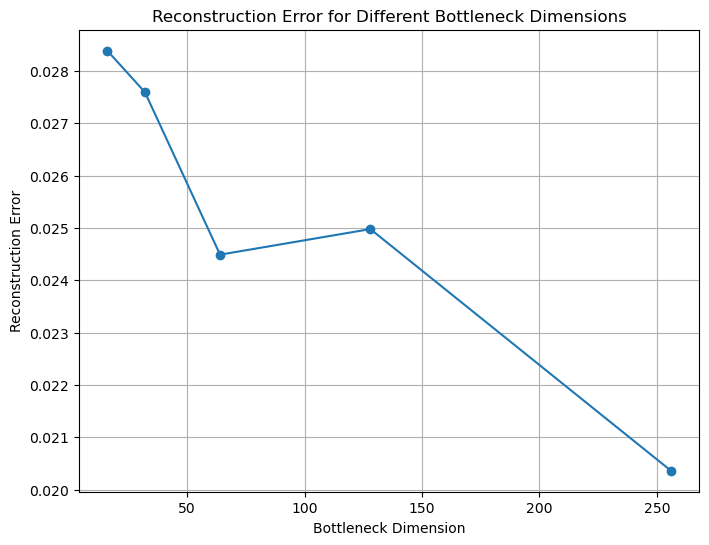

In [14]:
import matplotlib.pyplot as plt

# List of bottleneck dimensions
bottleneck_dims = [256, 128, 64, 32, 16]

# Dictionary to store reconstruction errors
reconstruction_errors = {}

# Loop through the bottleneck dimensions
for dim in bottleneck_dims:
    # Create and train the autoencoder model
    autoencoder = create_autoencoder(input_shape, dim)
    autoencoder.fit(x_train_80_10_10, x_train_80_10_10, validation_data=(x_val_80_10_10, x_val_80_10_10), epochs=10, batch_size=32)
    
    # Compute the reconstruction error on the validation set
    val_predictions = autoencoder.predict(x_val_80_10_10)
    reconstruction_error = np.mean(np.square(x_val_80_10_10 - val_predictions))
    
    # Store the reconstruction error
    reconstruction_errors[dim] = reconstruction_error
    
    # Clear the session and reset the graph for the next iteration
    tf.keras.backend.clear_session()

# Plot the reconstruction errors
plt.figure(figsize=(8, 6))
plt.plot(bottleneck_dims, list(reconstruction_errors.values()), marker='o')
plt.xlabel('Bottleneck Dimension')             
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Bottleneck Dimensions')
plt.grid(True)
plt.show()


In [ ]:
##Evaluation: Report MSE (mean square error), MAE (mean absolute error) for all models. Comment on which metric is more useful in judging the quality .     

In [18]:
import numpy as np

# Loop through the bottleneck dimensions
for dim in bottleneck_dims:
    # Create and train the autoencoder model
    autoencoder = create_autoencoder(input_shape, dim)
    autoencoder.fit(x_train_80_10_10, x_train_80_10_10, validation_data=(x_val_80_10_10, x_val_80_10_10), epochs=10, batch_size=32)
    
    # Compute the predictions on the validation set
    val_predictions = autoencoder.predict(x_val_80_10_10)
    
    # Compute the MSE and MAE using NumPy
    mse = np.mean(np.square(x_val_80_10_10 - val_predictions))
    mae = np.mean(np.abs(x_val_80_10_10 - val_predictions))
    
    # Print the MSE and MAE for the current model
    print("Bottleneck Dimension:", dim)
    print("MSE:", mse)
    print("MAE:", mae)
    print("--------------------")
    
    # Clear the session and reset the graph for the next iteration
    tf.keras.backend.clear_session()


Epoch 1/10
124/124 [==============================] - 284s 2s/step - loss: 0.0406 - val_loss: 0.0314
Epoch 2/10
124/124 [==============================] - 279s 2s/step - loss: 0.0269 - val_loss: 0.0268
Epoch 3/10
124/124 [==============================] - 381s 3s/step - loss: 0.0245 - val_loss: 0.0274
Epoch 4/10
124/124 [==============================] - 302s 2s/step - loss: 0.0235 - val_loss: 0.0253
Epoch 5/10
124/124 [==============================] - 274s 2s/step - loss: 0.0229 - val_loss: 0.0228
Epoch 6/10
124/124 [==============================] - 276s 2s/step - loss: 0.0221 - val_loss: 0.0235
Epoch 7/10
124/124 [==============================] - 274s 2s/step - loss: 0.0213 - val_loss: 0.0216
Epoch 8/10
124/124 [==============================] - 275s 2s/step - loss: 0.0208 - val_loss: 0.0216
Epoch 9/10
124/124 [==============================] - 272s 2s/step - loss: 0.0204 - val_loss: 0.0210
Epoch 10/10
16/16 [==============================] - 6s 392ms/step
Bottleneck Dimension: 25

Epoch 1/10
124/124 [==============================] - 118s 945ms/step - loss: 0.0397 - val_loss: 0.0405
Epoch 2/10
124/124 [==============================] - 115s 930ms/step - loss: 0.0273 - val_loss: 0.0283
Epoch 3/10
124/124 [==============================] - 117s 945ms/step - loss: 0.0253 - val_loss: 0.0267
Epoch 4/10
124/124 [==============================] - 116s 933ms/step - loss: 0.0244 - val_loss: 0.0263
Epoch 5/10
124/124 [==============================] - 116s 936ms/step - loss: 0.0237 - val_loss: 0.0246
Epoch 6/10
124/124 [==============================] - 118s 951ms/step - loss: 0.0231 - val_loss: 0.0245
Epoch 7/10
124/124 [==============================] - 117s 942ms/step - loss: 0.0226 - val_loss: 0.0232
Epoch 8/10
124/124 [==============================] - 116s 939ms/step - loss: 0.0223 - val_loss: 0.0237
Epoch 9/10
124/124 [==============================] - 117s 944ms/step - loss: 0.0219 - val_loss: 0.0234
Epoch 10/10
16/16 [==============================] - 3s 152ms/st

Epoch 1/10
124/124 [==============================] - 57s 454ms/step - loss: 0.0405 - val_loss: 0.0320
Epoch 2/10
124/124 [==============================] - 60s 487ms/step - loss: 0.0289 - val_loss: 0.0309
Epoch 3/10
124/124 [==============================] - 56s 448ms/step - loss: 0.0273 - val_loss: 0.0287
Epoch 4/10
124/124 [==============================] - 55s 443ms/step - loss: 0.0263 - val_loss: 0.0274
Epoch 5/10
124/124 [==============================] - 55s 447ms/step - loss: 0.0254 - val_loss: 0.0262
Epoch 6/10
124/124 [==============================] - 55s 446ms/step - loss: 0.0249 - val_loss: 0.0258
Epoch 7/10
124/124 [==============================] - 56s 448ms/step - loss: 0.0245 - val_loss: 0.0250
Epoch 8/10
124/124 [==============================] - 57s 463ms/step - loss: 0.0241 - val_loss: 0.0252
Epoch 9/10
124/124 [==============================] - 55s 444ms/step - loss: 0.0238 - val_loss: 0.0252
Epoch 10/10
16/16 [==============================] - 1s 74ms/step
Bottlen

Epoch 1/10
124/124 [==============================] - 29s 225ms/step - loss: 0.0484 - val_loss: 0.0366
Epoch 2/10
124/124 [==============================] - 29s 237ms/step - loss: 0.0319 - val_loss: 0.0307
Epoch 3/10
124/124 [==============================] - 28s 229ms/step - loss: 0.0287 - val_loss: 0.0297
Epoch 4/10
124/124 [==============================] - 27s 221ms/step - loss: 0.0274 - val_loss: 0.0281
Epoch 5/10
124/124 [==============================] - 28s 228ms/step - loss: 0.0269 - val_loss: 0.0281
Epoch 6/10
124/124 [==============================] - 27s 218ms/step - loss: 0.0265 - val_loss: 0.0271
Epoch 7/10
124/124 [==============================] - 27s 217ms/step - loss: 0.0262 - val_loss: 0.0270
Epoch 8/10
124/124 [==============================] - 27s 221ms/step - loss: 0.0259 - val_loss: 0.0266
Epoch 9/10
124/124 [==============================] - 27s 218ms/step - loss: 0.0256 - val_loss: 0.0262
Epoch 10/10
16/16 [==============================] - 1s 38ms/step
Bottlen

Epoch 1/10
124/124 [==============================] - 18s 141ms/step - loss: 0.0544 - val_loss: 0.0443
Epoch 2/10
124/124 [==============================] - 17s 137ms/step - loss: 0.0361 - val_loss: 0.0397
Epoch 3/10
124/124 [==============================] - 17s 137ms/step - loss: 0.0341 - val_loss: 0.0386
Epoch 4/10
124/124 [==============================] - 17s 135ms/step - loss: 0.0329 - val_loss: 0.0358
Epoch 5/10
124/124 [==============================] - 17s 138ms/step - loss: 0.0321 - val_loss: 0.0332
Epoch 6/10
124/124 [==============================] - 17s 138ms/step - loss: 0.0308 - val_loss: 0.0337
Epoch 7/10
124/124 [==============================] - 17s 136ms/step - loss: 0.0295 - val_loss: 0.0327
Epoch 8/10
124/124 [==============================] - 17s 138ms/step - loss: 0.0291 - val_loss: 0.0334
Epoch 9/10
124/124 [==============================] - 17s 137ms/step - loss: 0.0287 - val_loss: 0.0316
Epoch 10/10
16/16 [==============================] - 1s 27ms/step
Bottlen

In [ ]:
#Visualize and compare the original images, masked images, and reconstructed images. 

16/16 [==============================] - 1s 64ms/step


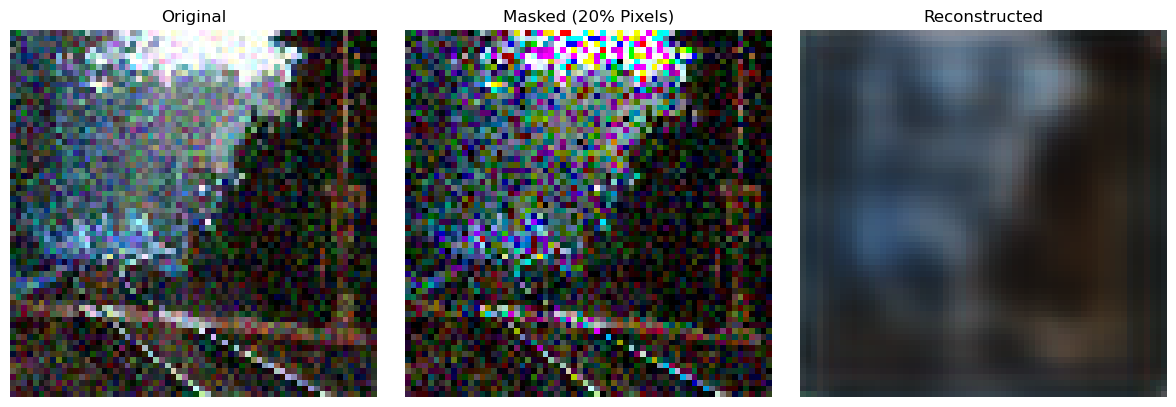

16/16 [==============================] - 1s 64ms/step


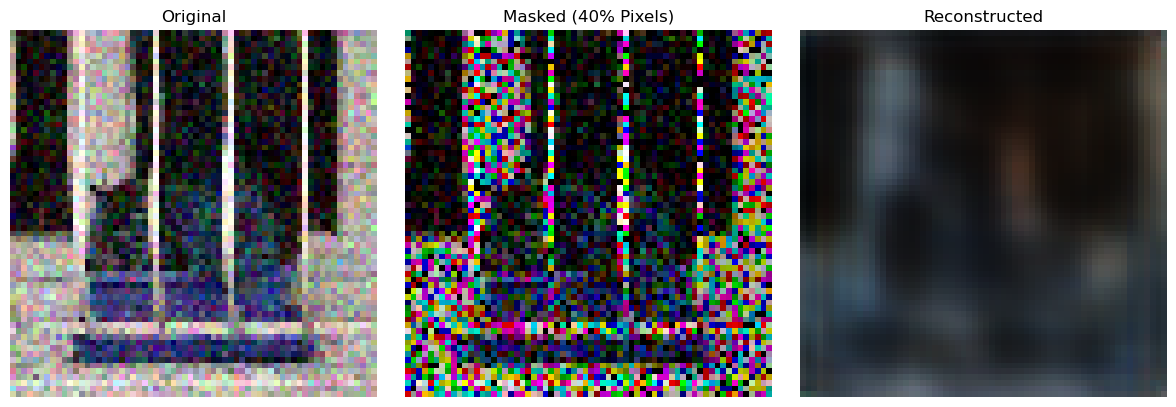

16/16 [==============================] - 1s 62ms/step


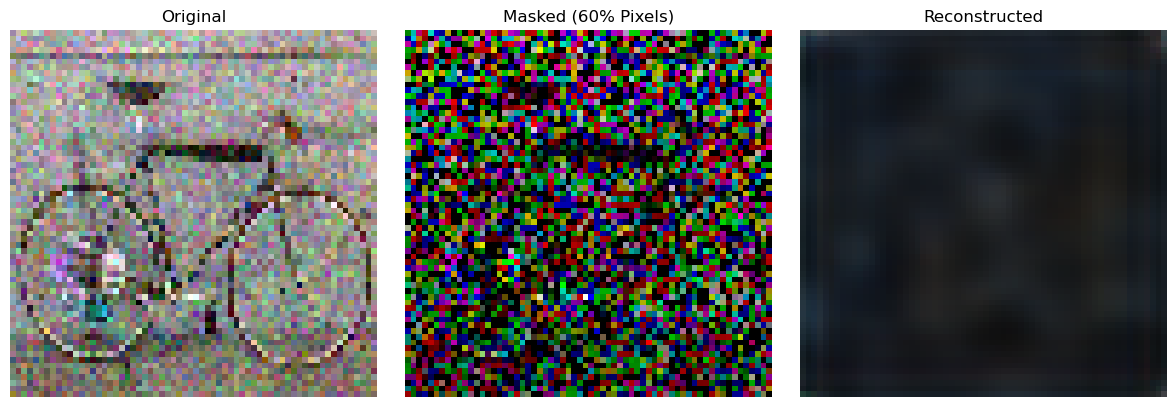

16/16 [==============================] - 1s 63ms/step


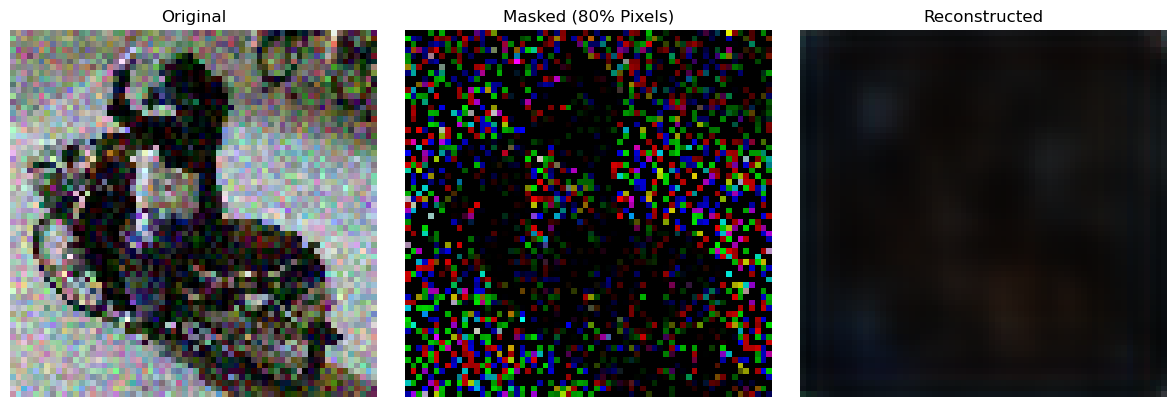

In [19]:
import matplotlib.pyplot as plt

# Set the desired masking percentages
masking_percentages = [20, 40, 60, 80]

# Loop through the masking percentages
for percentage in masking_percentages:
    # Mask the images
    masked_images = np.copy(x_val_80_10_10)
    mask = np.random.choice([0, 1], size=x_val_80_10_10.shape, p=[percentage/100, 1-(percentage/100)])
    masked_images = masked_images * mask
    
    # Reconstruct the masked images
    reconstructed_images = autoencoder.predict(masked_images)
    
    # Select a random sample from the validation set for visualization
    sample_index = np.random.randint(0, x_val_80_10_10.shape[0])
    original_image = x_val_80_10_10[sample_index]
    masked_image = masked_images[sample_index]
    reconstructed_image = reconstructed_images[sample_index]
    
    # Plot the original, masked, and reconstructed images
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    axes[0].imshow(original_image)
    axes[0].set_title("Original")
    
    axes[1].imshow(masked_image)
    axes[1].set_title("Masked ({}% Pixels)".format(percentage))
    
    axes[2].imshow(reconstructed_image)
    axes[2].set_title("Reconstructed")
    
    for ax in axes:
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()


In [ ]:
#Use any other metric of your choice (apart from MSE, MAE) to judge the image quality.

16/16 [==============================] - 1s 63ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_13748\2787593309.py:35: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image, reconstructed_image, multichannel=True)


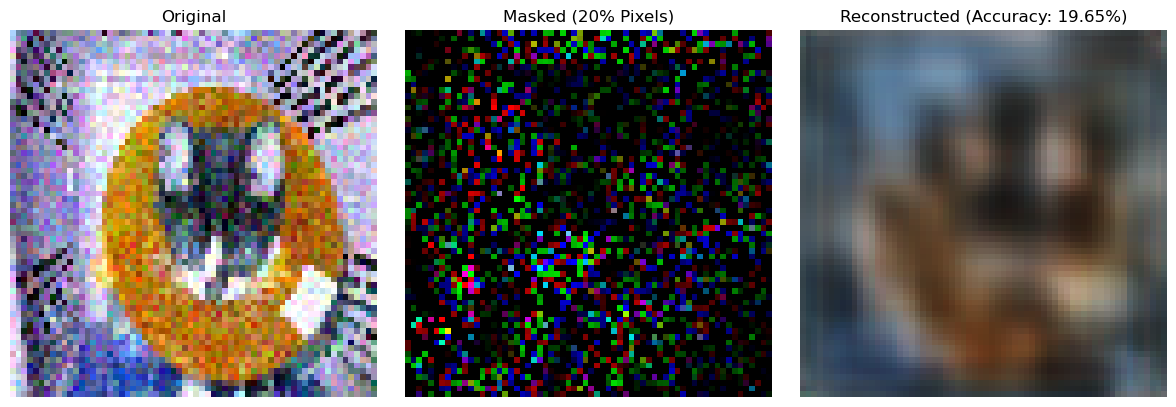

16/16 [==============================] - 1s 70ms/step


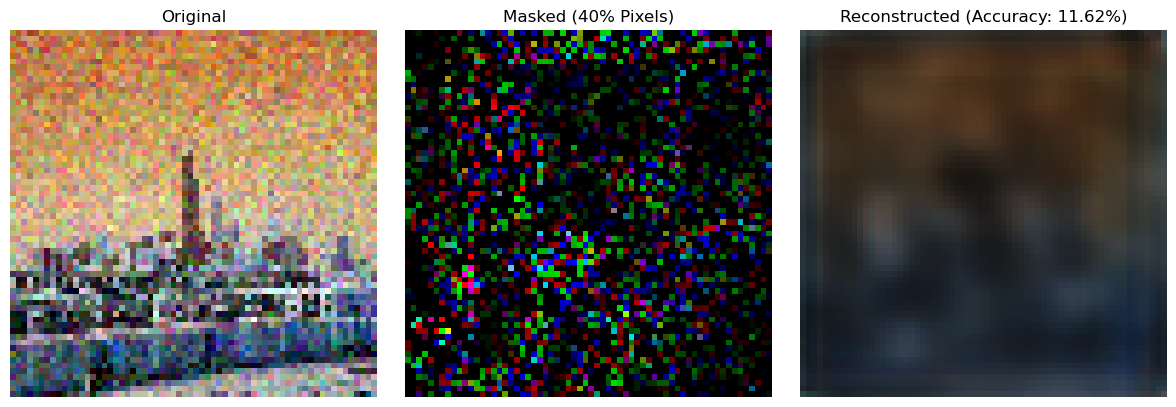

16/16 [==============================] - 1s 65ms/step


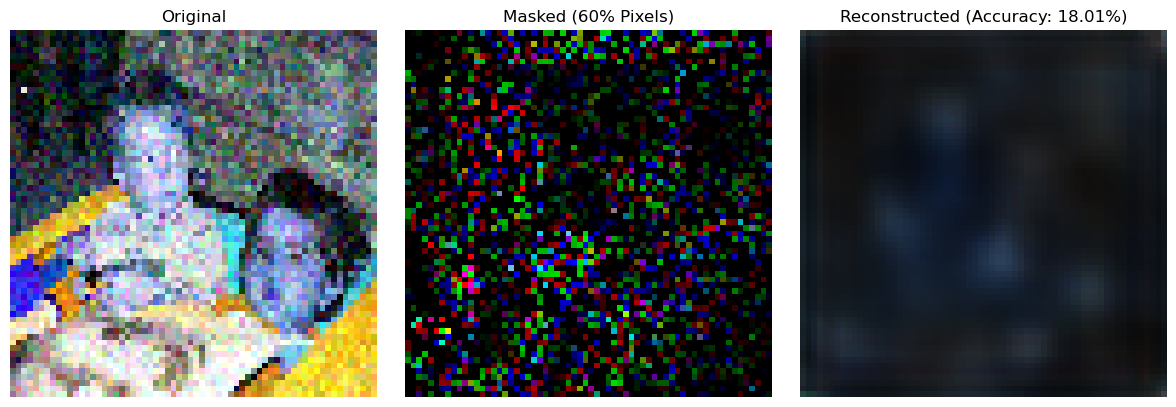

16/16 [==============================] - 1s 64ms/step


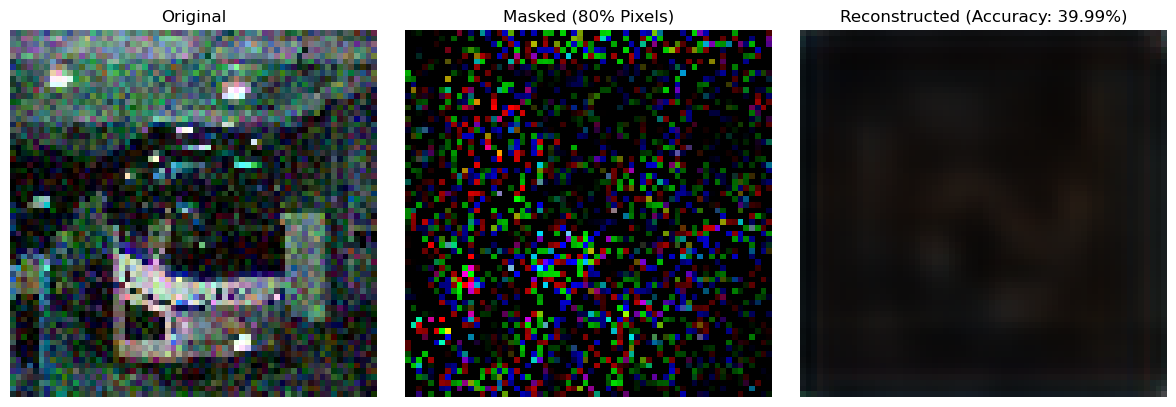

Masking Percentage: 20%, Accuracy: 19.65%, SSIM Score: 0.2015
Masking Percentage: 40%, Accuracy: 11.62%, SSIM Score: 0.1191
Masking Percentage: 60%, Accuracy: 18.01%, SSIM Score: 0.0768
Masking Percentage: 80%, Accuracy: 39.99%, SSIM Score: 0.1052


In [38]:
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Set the desired masking percentages
masking_percentages = [20, 40, 60, 80]

# Define the threshold value
threshold = 0.1  # Example threshold value

# Create lists to store accuracies and SSIM scores
accuracies = []
ssim_scores = []

# Loop through the masking percentages
for percentage in masking_percentages:
    # Mask the images
    masked_images = np.copy(x_val_80_10_10)
    mask = np.random.choice([0, 1], size=x_val_80_10_10.shape, p=[percentage/100, 1-(percentage/100)])
    masked_images = masked_images * mask
    
    # Reconstruct the masked images
    reconstructed_images = autoencoder.predict(masked_images)
    
    # Select a random sample from the validation set for evaluation
    sample_index = np.random.randint(0, x_val_80_10_10.shape[0])
    original_image = x_val_80_10_10[sample_index]
    reconstructed_image = reconstructed_images[sample_index]
    
    # Calculate the accuracy
    num_pixels = np.prod(original_image.shape)
    num_correct = np.sum(np.abs(original_image - reconstructed_image) <= threshold)
    accuracy = num_correct / num_pixels
    
    # Calculate the SSIM score
    ssim_score = ssim(original_image, reconstructed_image, multichannel=True)
    
    # Append accuracy and SSIM score to the lists
    accuracies.append(accuracy)
    ssim_scores.append(ssim_score)
    
    # Plot the original, masked, and reconstructed images
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    axes[0].imshow(original_image)
    axes[0].set_title("Original")
    
    axes[1].imshow(masked_image)
    axes[1].set_title("Masked ({}% Pixels)".format(percentage))
    
    axes[2].imshow(reconstructed_image)
    axes[2].set_title("Reconstructed (Accuracy: {:.2%})".format(accuracy))
    
    for ax in axes:
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

# Print the accuracies and SSIM scores
for i, percentage in enumerate(masking_percentages):
    print("Masking Percentage: {}%, Accuracy: {:.2%}, SSIM Score: {:.4f}".format(percentage, accuracies[i], ssim_scores[i]))


In [36]:
# Que>Use the best split, and best masking strategy (with best encoding dimension) for Task 2
# Ans>I will consider Datasplit 80_10_10 for task2